### In this section we'll make a linear regression model for predicting insurace charge
#### the data set is got from kaggle

In [73]:
# importing most common libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

%matplotlib inline

In [74]:
# importing data set & viewing

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
# view data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
# overall statistic of the dataset

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [77]:
# checking for null or missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### getting dummy variables for the categorical data

In [78]:
dummies = pd.get_dummies(df[['sex', 'smoker', 'region']])

In [79]:
dummies.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [80]:
dummies = dummies.drop(['sex_female', 'smoker_no', 'region_northeast'], axis = 1)

In [81]:
dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [82]:
marged_data = pd.concat([df, dummies], axis = 'columns')

In [83]:
marged_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [84]:
marged_data = marged_data.drop(['sex', 'smoker', 'region'], axis = 1)

In [85]:
marged_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Explototy data analysis

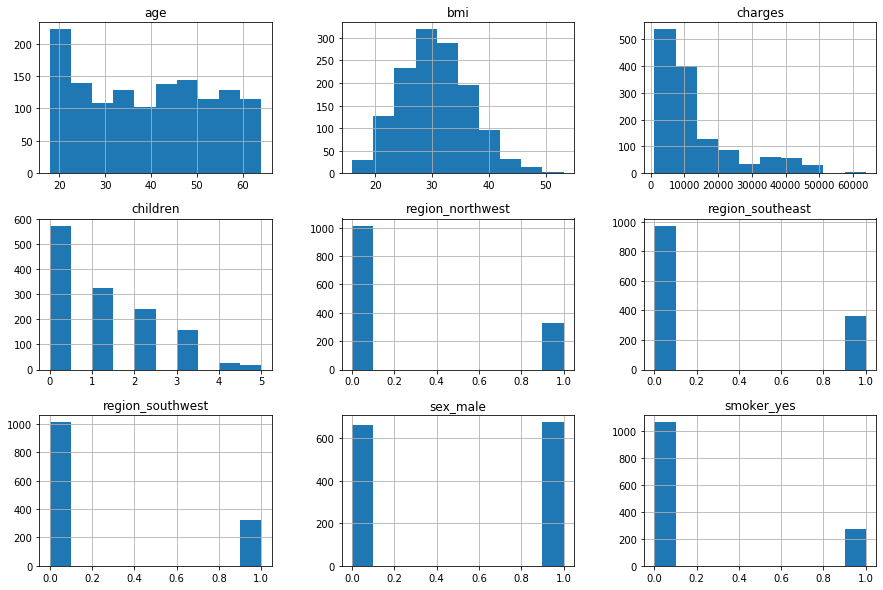

In [86]:
# histagram

hist = marged_data.hist(figsize = (15,10))

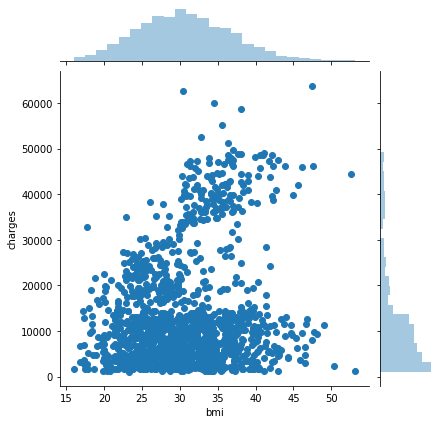

In [87]:
# jointplot for 'BMI' & 'Charge'

ax = sns.jointplot(marged_data['bmi'], marged_data['charges'], kind = 'scatter')

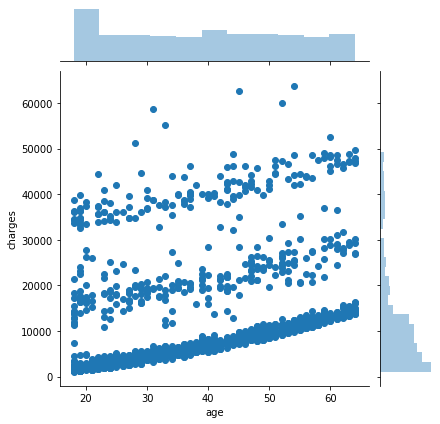

In [88]:
# jointplot for 'Age' & 'Charge'

ax = sns.jointplot(marged_data['age'], marged_data['charges'], kind = 'scatter')

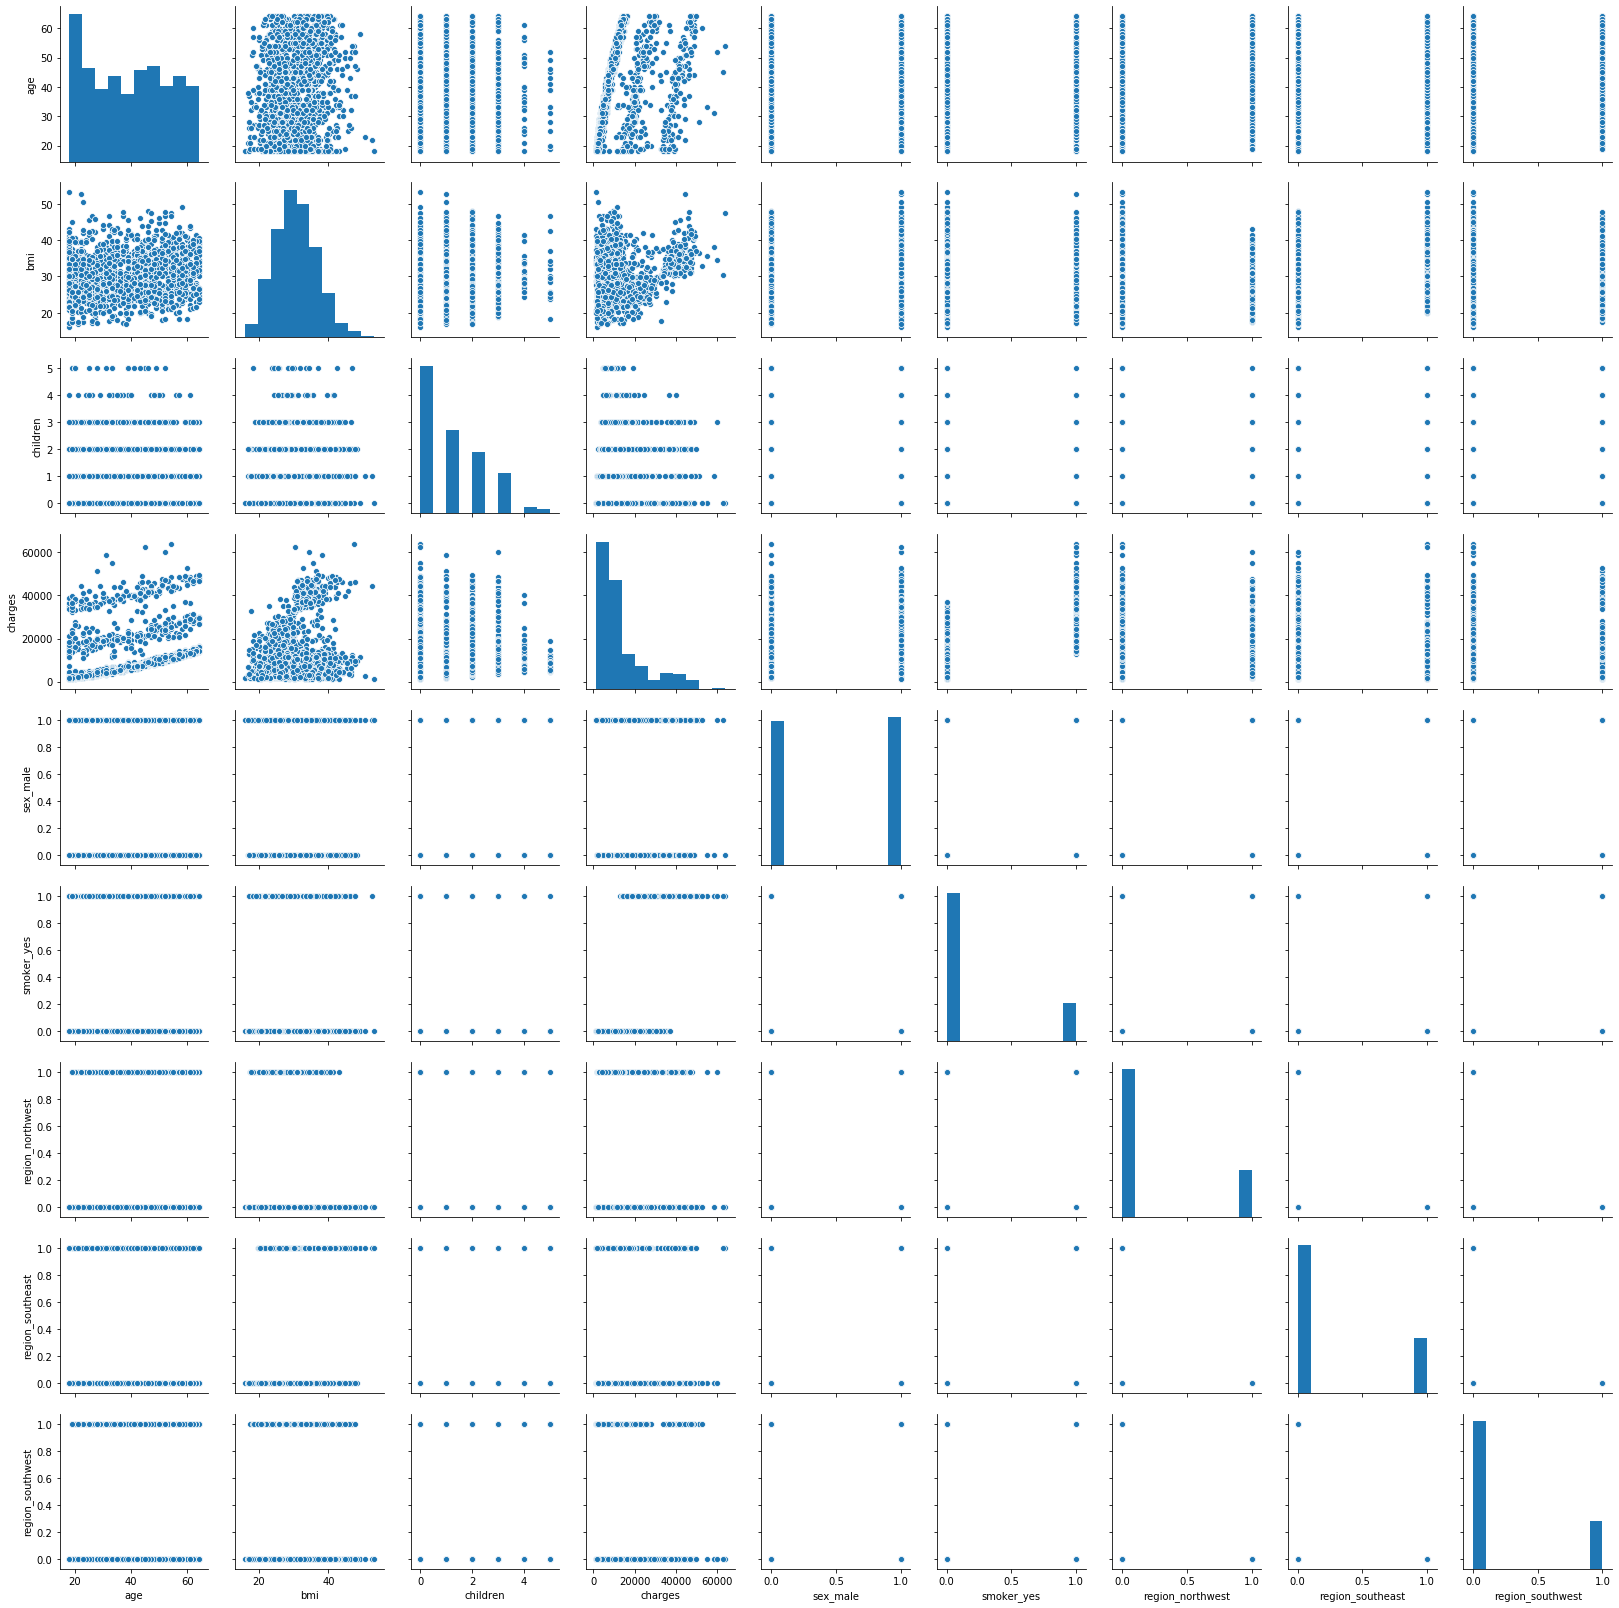

In [89]:
# visiualizing the pairplot

sns.pairplot(marged_data)

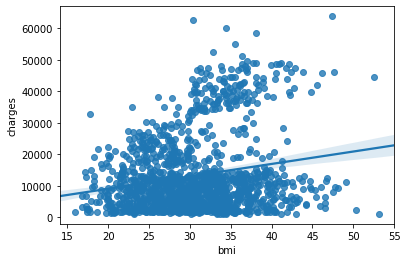

In [90]:
# maing a linear model with seaborn for ('bmi' vs ' charges')

linears= sns.regplot(x = marged_data['bmi'], y =marged_data['charges'], data = marged_data)

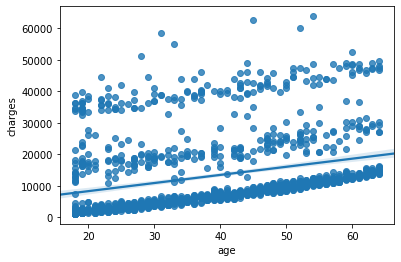

In [91]:
# maing a linear model with seaborn for ('age' vs ' charges')

linears= sns.regplot(x = marged_data['age'], y =marged_data['charges'], data = marged_data)

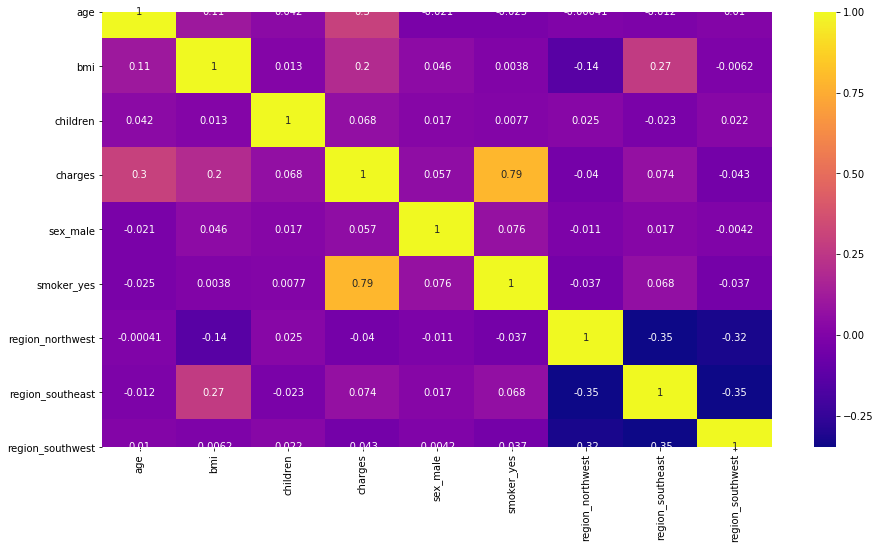

In [92]:
# viewing the correlation with heatmap

plt.figure(figsize= (15,8))
sns.heatmap(marged_data.corr(), annot = True, cmap = 'plasma')

In [94]:
marged_data = marged_data.drop(['region_northwest', 'region_southeast'], axis = 1)

In [95]:
# dividing the data into dependent & independent variables

x = marged_data.drop('charges', axis = 1)
y = marged_data['charges']

### creating the model

In [96]:
# import train test split for dividing dataset for train & testing

from sklearn.model_selection import train_test_split

In [97]:
# dividing into train test split by taking test size of 30%

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 37)

In [98]:
# importing the LinearRegession library

from sklearn.linear_model import LinearRegression

In [99]:
# creating instance for the model

regr = LinearRegression()

In [100]:
# fitting the train data to the instance

regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
# intercept

regr.intercept_

-11938.848416366245

In [102]:
# coefficient

regr.coef_

array([  268.3803915 ,   307.98422123,   537.45690025,  -171.39844104,
       24214.83512082,  -222.15986318])

In [103]:
# predicting charges

pred = regr.predict(x_test)

In [104]:
# comparing with actual charges

compare = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
compare.head()

,Actual,Predicted
400,9264.7970,7870.866644
1073,12096.6512,12523.190834
506,2643.2685,3986.883991
837,11657.7189,11809.486810
1078,34672.1472,29376.179354


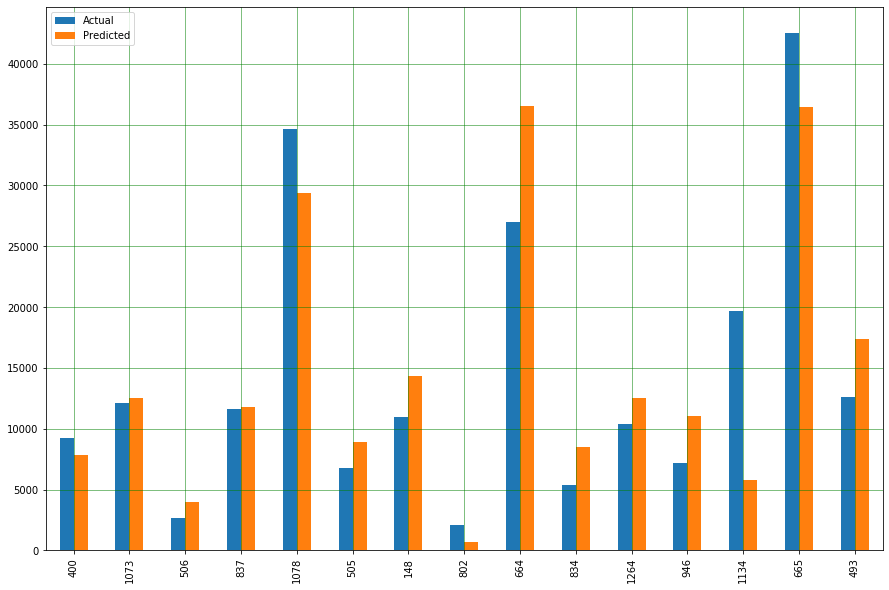

In [105]:
# comparing with graph

df1 = compare.head(15)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
plt.show()

### evaluating the model

In [106]:
# importing metrics

from sklearn import metrics

In [107]:
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

In [108]:
print(mae)
print(mse)
print(rmse)

4079.9786807922746
33862884.00384583
5819.182417130935


In [109]:
metrics.explained_variance_score(y_test, pred)

0.7608335668224452

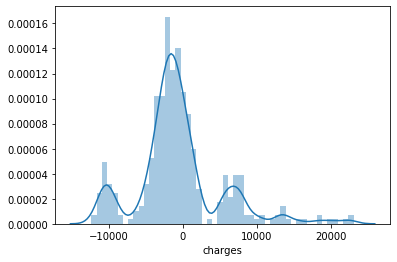

In [110]:
sns.distplot((y_test- pred), bins =50)

In [111]:
cdf = pd.DataFrame(regr.coef_, x.columns, columns =['Coefficient'])

In [112]:
cdf

,Coefficient
age,268.380391
bmi,307.984221
children,537.456900
sex_male,-171.398441
smoker_yes,24214.835121
region_southwest,-222.159863
